In [48]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.special import expit, exprel
!pip install umap-learn
import umap
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, mean_absolute_error,
                             mean_squared_error, precision_score, recall_score, r2_score,
                             confusion_matrix, roc_curve, roc_auc_score, silhouette_samples, silhouette_score, auc)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


In [49]:
seed = random.seed(16284294)
print(seed)
n_id_number = 16284294

None


In [50]:
# Load the dataset
file_path = 'musicData.csv'
data = pd.read_csv(file_path)

In [51]:
data

instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913         -1.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness key  liveness  loudness   mode  speechiness  \
0               0.79200  A#     0.115    -5.201  Minor       0.0748   
1               0.95000   D     0.124    -7.043  Minor       0.0300   
2               0.01180  G#     0.534    -4.617  Major       0.0345   
3               0.00253  C#     0.157    -4.498  Major       0.2390   
4               0.90900  F#     0.157    -6.266  Major       0.0413   
...                 ...  ..       ...       ...    ...          ...   
50000           0.00000  C#     0.119    -7.022  Major       0.2980   
50001           0.00000   B     0.109    -9.814  Major       0.0550   
50002           0.00000   D     0.143    -5.443  Major       0.1460   
50003           0.00000   G     0.106    -5.016  Minor       0.0441   
50004           0.00000  F#     0.272   -13.652  Minor       0.1010   

                    tempo obtained_date  valence music_genre  
0                 100.889         4-Apr    0.759  Electronic  
1      115.00200000000001         4-Apr    0.531  Electronic  
2                 127.994         4-Apr    0.333  Electronic  
3                 128.014         4-Apr    0.270  Electronic  
4                 145.036         4-Apr    0.323  Electronic  
...                   ...           ...      ...         ...  
50000   98.02799999999999         4-Apr    0.330     Hip-Hop  
50001  122.04299999999999         4-Apr    0.113     Hip-Hop  
50002             131.079         4-Apr    0.395     Hip-Hop  
50003   75.88600000000001         4-Apr    0.354     Hip-Hop  
50004   99.20100000000001         4-Apr    0.765     Hip-Hop  

[50005 rows x 18 columns]

In [52]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [53]:
print("Number of rows and columns:", data.shape)

Number of rows and columns: (50005, 18)


In [54]:
# Get information about data types and missing values
print("Data types and missing values:")
data.info()

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence  

In [55]:
# Summary statistics for numeric columns
print("Summary statistics for numeric columns:")
data.describe()

Summary statistics for numeric columns:


instance_id    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   55888.396360     44.220420      0.306383      0.558241  2.212526e+05   
std    20725.256253     15.542008      0.341340      0.178632  1.286720e+05   
min    20002.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    37973.500000     34.000000      0.020000      0.442000  1.748000e+05   
50%    55913.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    73863.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    91759.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness      liveness      loudness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      0.193896     -9.133761   
std        0.264559          0.325409      0.161637      6.162990   
min        0.000792          0.000000      0.009670    -47.046000   
25%        0.433000          0.000000      0.096900    -10.860000   
50%        0.643000          0.000158      0.126000     -7.276500   
75%        0.815000          0.155000      0.244000     -5.173000   
max        0.999000          0.996000      1.000000      3.744000   

        speechiness       valence  
count  50000.000000  50000.000000  
mean       0.093586      0.456264  
std        0.101373      0.247119  
min        0.022300      0.000000  
25%        0.036100      0.257000  
50%        0.048900      0.448000  
75%        0.098525      0.648000  
max        0.942000      0.992000

In [56]:
#Sum of the NA values:
print("Number of missing NAN values: ")
data.isna().sum()

Number of missing NAN values: 


instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [57]:
data.dropna(inplace=True)

In [58]:
data.shape

(50000, 18)

<ipython-input-59-0ffd1d891faa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')


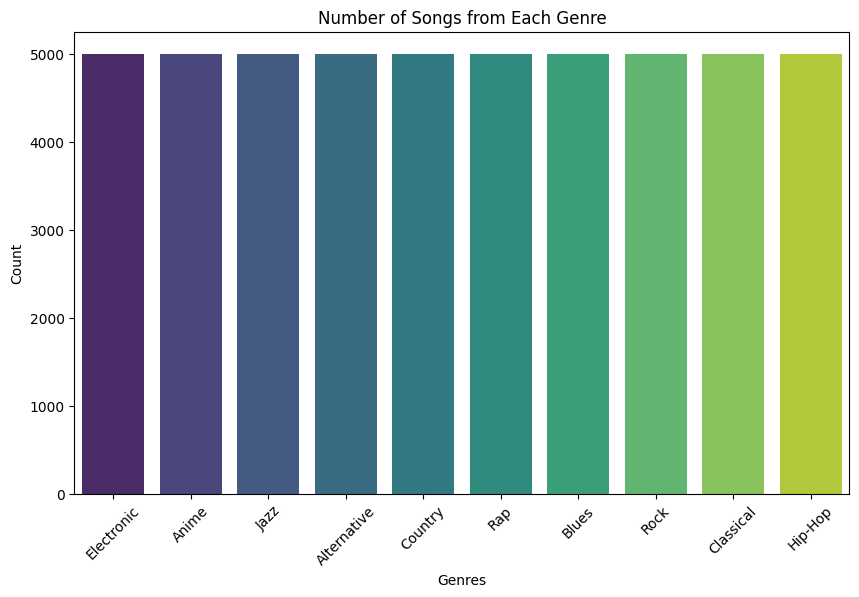

         Genre  Count
0   Electronic   5000
1        Anime   5000
2         Jazz   5000
3  Alternative   5000
4      Country   5000
5          Rap   5000
6        Blues   5000
7         Rock   5000
8    Classical   5000
9      Hip-Hop   5000


In [59]:
# Plotting count of each genre
plt.figure(figsize=(10, 6))
genre_count = data['music_genre'].value_counts().sort_values(ascending=False)
sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
plt.title('Number of Songs from Each Genre')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Displaying counts in a table
genre_count_df = genre_count.reset_index()
genre_count_df.columns = ['Genre', 'Count']
print(genre_count_df)

In [60]:
key_mapping = {'A': 0,'A#': 1,'B': 2,'C': 3,'C#': 4,'D': 5,'D#': 6,'E': 7,'F': 8,'F#': 9,'G': 10, 'G#': 11}
data['key'] = data['key'].map(key_mapping)
data['mode'] = data['mode'].map({'Major': 1, 'Minor': 0})

# Map and label encode 'music_genre'
genre_mapping = {
    'Alternative': 0, 'Anime': 1, 'Blues': 2, 'Classical': 3, 'Country': 4,
    'Electronic': 5, 'Hip-Hop': 6, 'Jazz': 7, 'Rap': 8, 'Rock': 9
}
data['music_genre'] = data['music_genre'].map(genre_mapping)

# Encode the target variable (genre)
label_encoder = LabelEncoder()
data['music_genre'] = label_encoder.fit_transform(data['music_genre'])

In [61]:
data['mode'].value_counts()
data['key'].value_counts()

key
10    5727
3     5522
4     5405
5     5265
0     4825
8     4341
2     3789
7     3760
1     3356
11    3319
9     3101
6     1590
Name: count, dtype: int64

In [62]:
# Handle incorrect tempo data
data['tempo'] = pd.to_numeric(data['tempo'], errors='coerce')  # Convert tempo to numeric, coerce errors to NaN

# Check for '?' in tempo and count NaNs
tempo_missing_count = data['tempo'].isna().sum()
# Recheck the number of NaNs in tempo, which should be equivalent to non-numeric entries like '?'
tempo_nan_count = data['tempo'].isna().sum()

# Impute NaN values in 'tempo' with each genre's respective median tempo
data['tempo'].fillna(data.groupby('music_genre')['tempo'].transform('median'), inplace=True)

# Dropping all rows where 'tempo' is now NaN
#data = data.dropna(subset=['tempo'])

# Confirm the imputation
print(tempo_nan_count)

4980


In [63]:
# Replace '-1' values in 'duration_ms' with NaN for accurate calculation
data['duration_ms'].replace(-1, pd.NA, inplace=True)

# Recheck and confirm if any incorrect entries in duration_ms
duration_nan_count = data['duration_ms'].isna().sum()

# Impute NaN values in 'duration_ms' with each genre's respective median duration_ms
data['duration_ms'].fillna(data.groupby('music_genre')['duration_ms'].transform('median'), inplace=True)

# Calculate median and mean duration_ms for each genre, now that all erroneous values have been handled
genre_duration_stats = data.groupby('music_genre')['duration_ms'].agg(['median', 'mean'])

# Output the number of NaNs and the calculated statistics
print(duration_nan_count)
print(genre_duration_stats)



4939
               median         mean
music_genre                       
0            225691.0  232567.7622
1            238820.0  231473.2956
2            230227.0  251541.1210
3            262000.0  304790.8486
4            211626.5  216380.2146
5            245217.0  268241.4420
6            215240.0  219489.5638
7            247850.0  262728.8362
8            214447.0  218468.2672
9            225347.0  235668.6000


In [64]:
data.shape

(50000, 18)

In [65]:
data

instance_id           artist_name                track_name  \
0          32894.0              Röyksopp      Röyksopp's Night Out   
1          46652.0  Thievery Corporation          The Shining Path   
2          30097.0        Dillon Francis                 Hurricane   
3          62177.0              Dubloadz                     Nitro   
4          24907.0           What So Not          Divide & Conquer   
...            ...                   ...                       ...   
50000      58878.0                 BEXEY                  GO GETTA   
50001      43557.0             Roy Woods       Drama (feat. Drake)   
50002      39767.0                Berner  Lovin' Me (feat. Smiggz)   
50003      57944.0             The-Dream         Shawty Is Da Shit   
50004      63470.0     Naughty By Nature            Hip Hop Hooray   

       popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652     245217.0   0.941   
1            31.0       0.01270         0.622     218293.0   0.890   
2            28.0       0.00306         0.620     215613.0   0.755   
3            34.0       0.02540         0.774     166875.0   0.700   
4            32.0       0.00465         0.638     222369.0   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913     215240.0   0.574   
50001        72.0       0.15700         0.709     251860.0   0.362   
50002        51.0       0.00597         0.693     189483.0   0.763   
50003        65.0       0.08310         0.782     262773.0   0.472   
50004        67.0       0.10200         0.862     267267.0   0.642   

       instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0               0.79200    1     0.115    -5.201     0       0.0748  100.889   
1               0.95000    5     0.124    -7.043     0       0.0300  115.002   
2               0.01180   11     0.534    -4.617     1       0.0345  127.994   
3               0.00253    4     0.157    -4.498     1       0.2390  128.014   
4               0.90900    9     0.157    -6.266     1       0.0413  145.036   
...                 ...  ...       ...       ...   ...          ...      ...   
50000           0.00000    4     0.119    -7.022     1       0.2980   98.028   
50001           0.00000    2     0.109    -9.814     1       0.0550  122.043   
50002           0.00000    5     0.143    -5.443     1       0.1460  131.079   
50003           0.00000   10     0.106    -5.016     0       0.0441   75.886   
50004           0.00000    9     0.272   -13.652     0       0.1010   99.201   

      obtained_date  valence  music_genre  
0             4-Apr    0.759            5  
1             4-Apr    0.531            5  
2             4-Apr    0.333            5  
3             4-Apr    0.270            5  
4             4-Apr    0.323            5  
...             ...      ...          ...  
50000         4-Apr    0.330            6  
50001         4-Apr    0.113            6  
50002         4-Apr    0.395            6  
50003         4-Apr    0.354            6  
50004         4-Apr    0.765            6  

[50000 rows x 18 columns]

<Figure size 1500x1000 with 0 Axes>

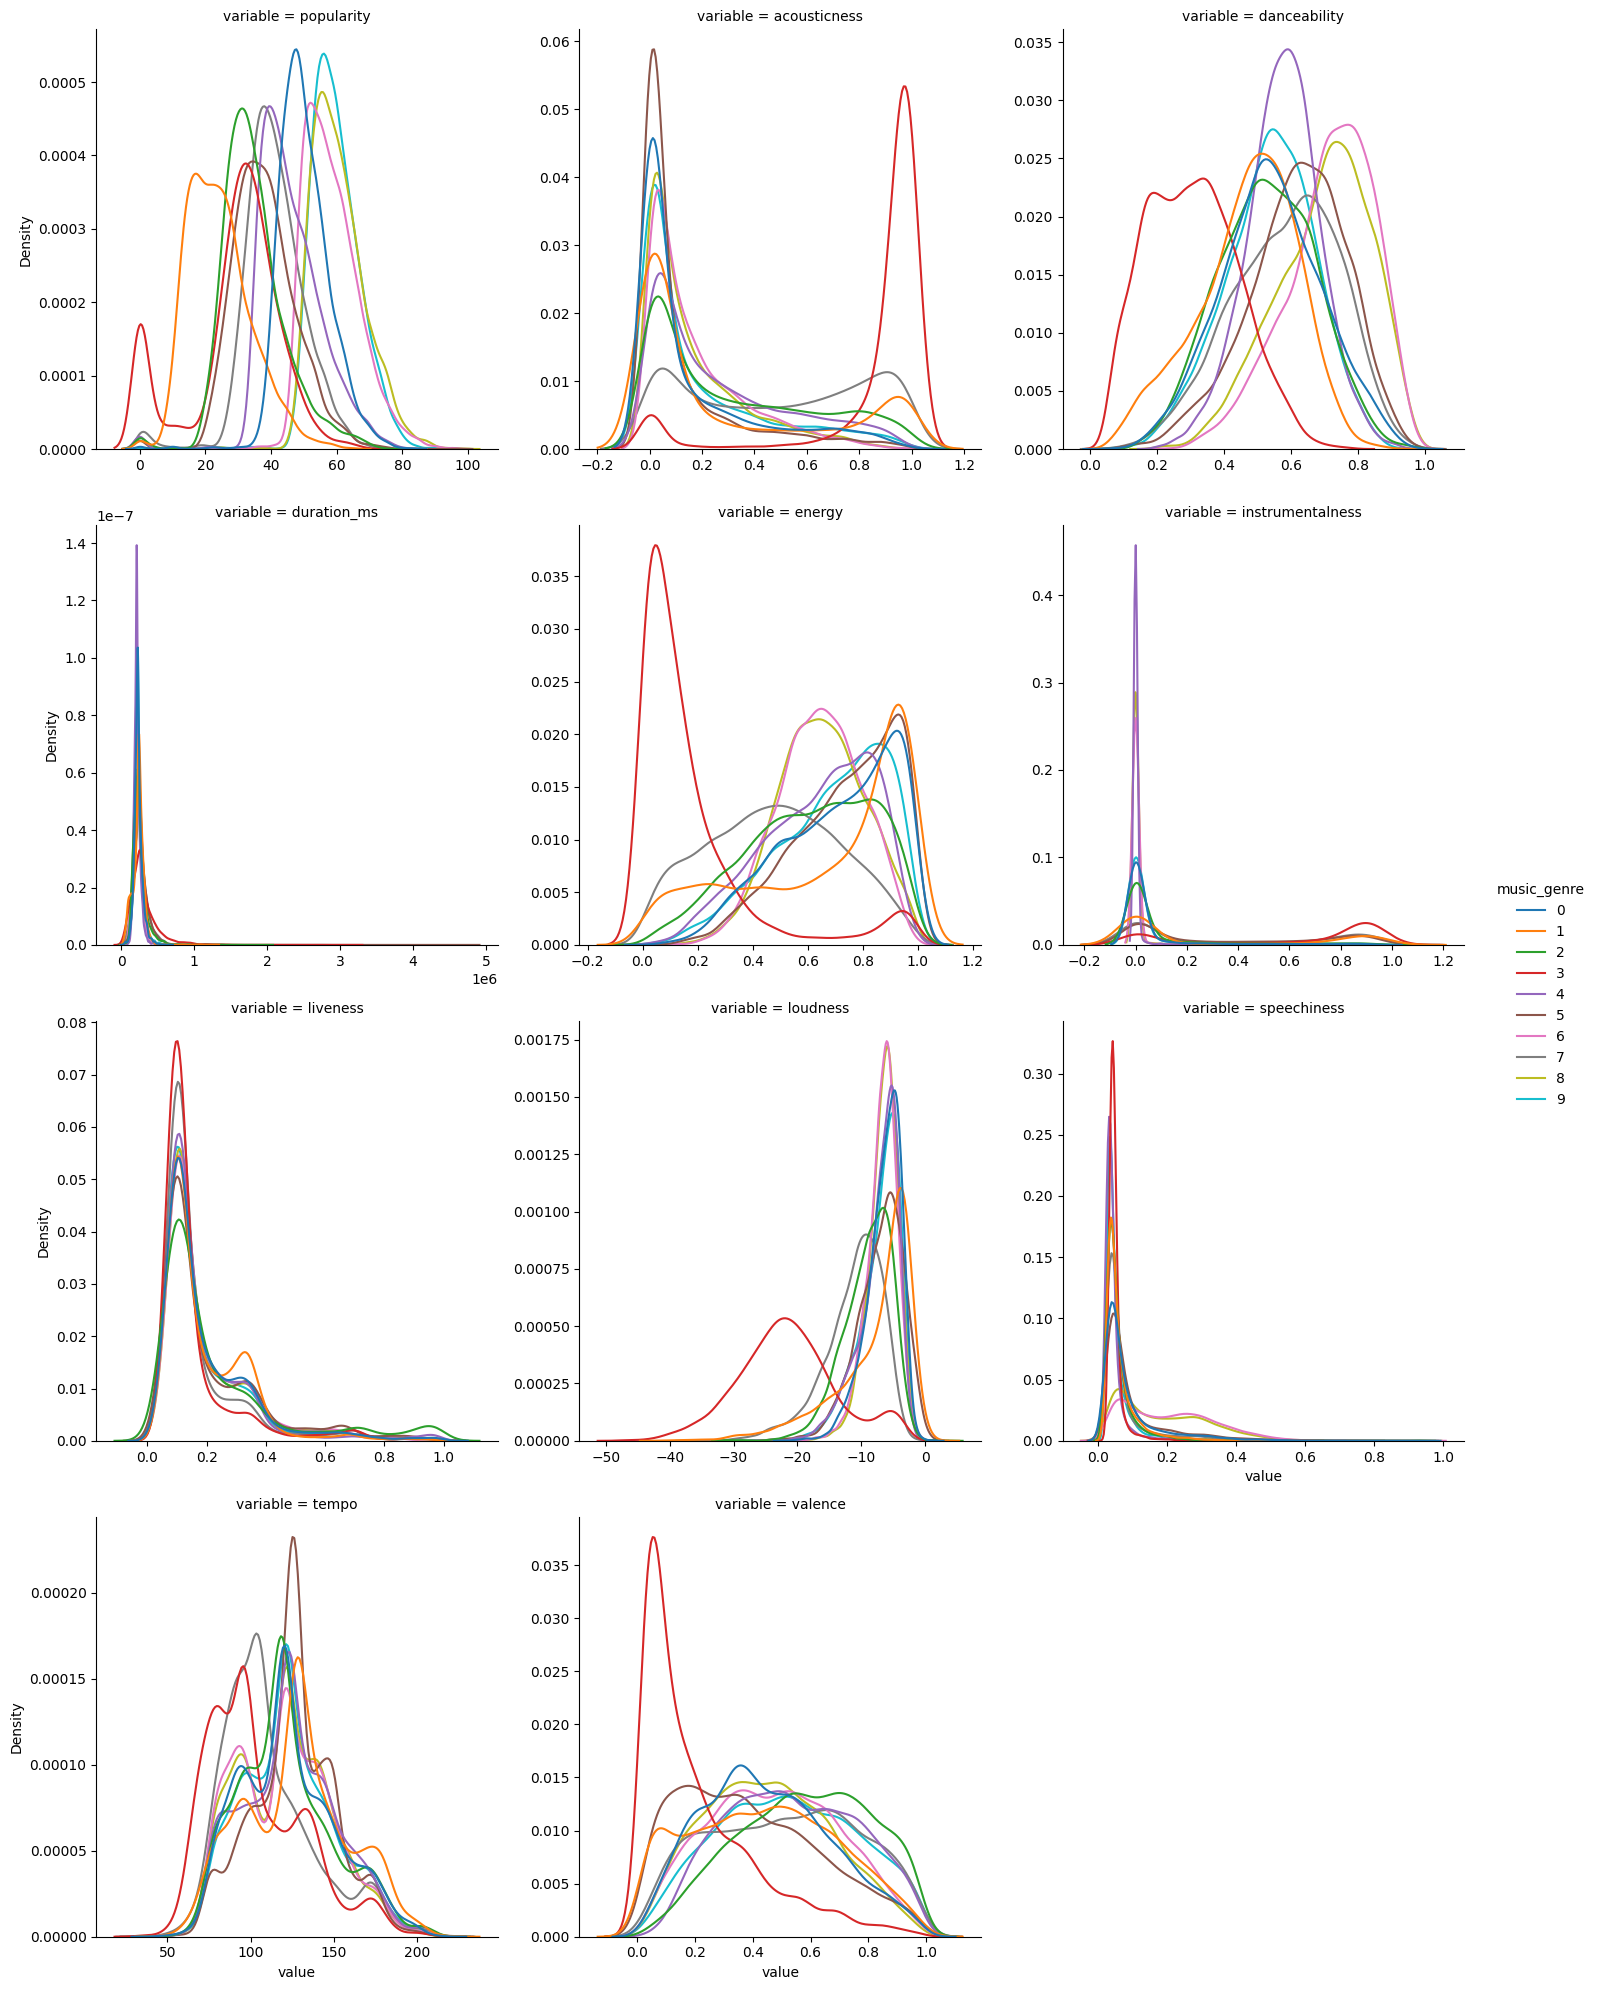

In [66]:
# Extracting all the audio feature columns
feature_names = data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]  # Adjust index based on your dataset

# Melting the DataFrame to make it long-form
songs_melted = data.melt(id_vars=['music_genre'], value_vars=feature_names)
palette = 'tab10'
# Plotting density plots of the audio features
plt.figure(figsize=(15, 10))
sns.displot(data=songs_melted, x='value', hue='music_genre', kind='kde', col='variable', col_wrap=3, palette=palette, facet_kws={'sharex': False, 'sharey': False})
plt.show()

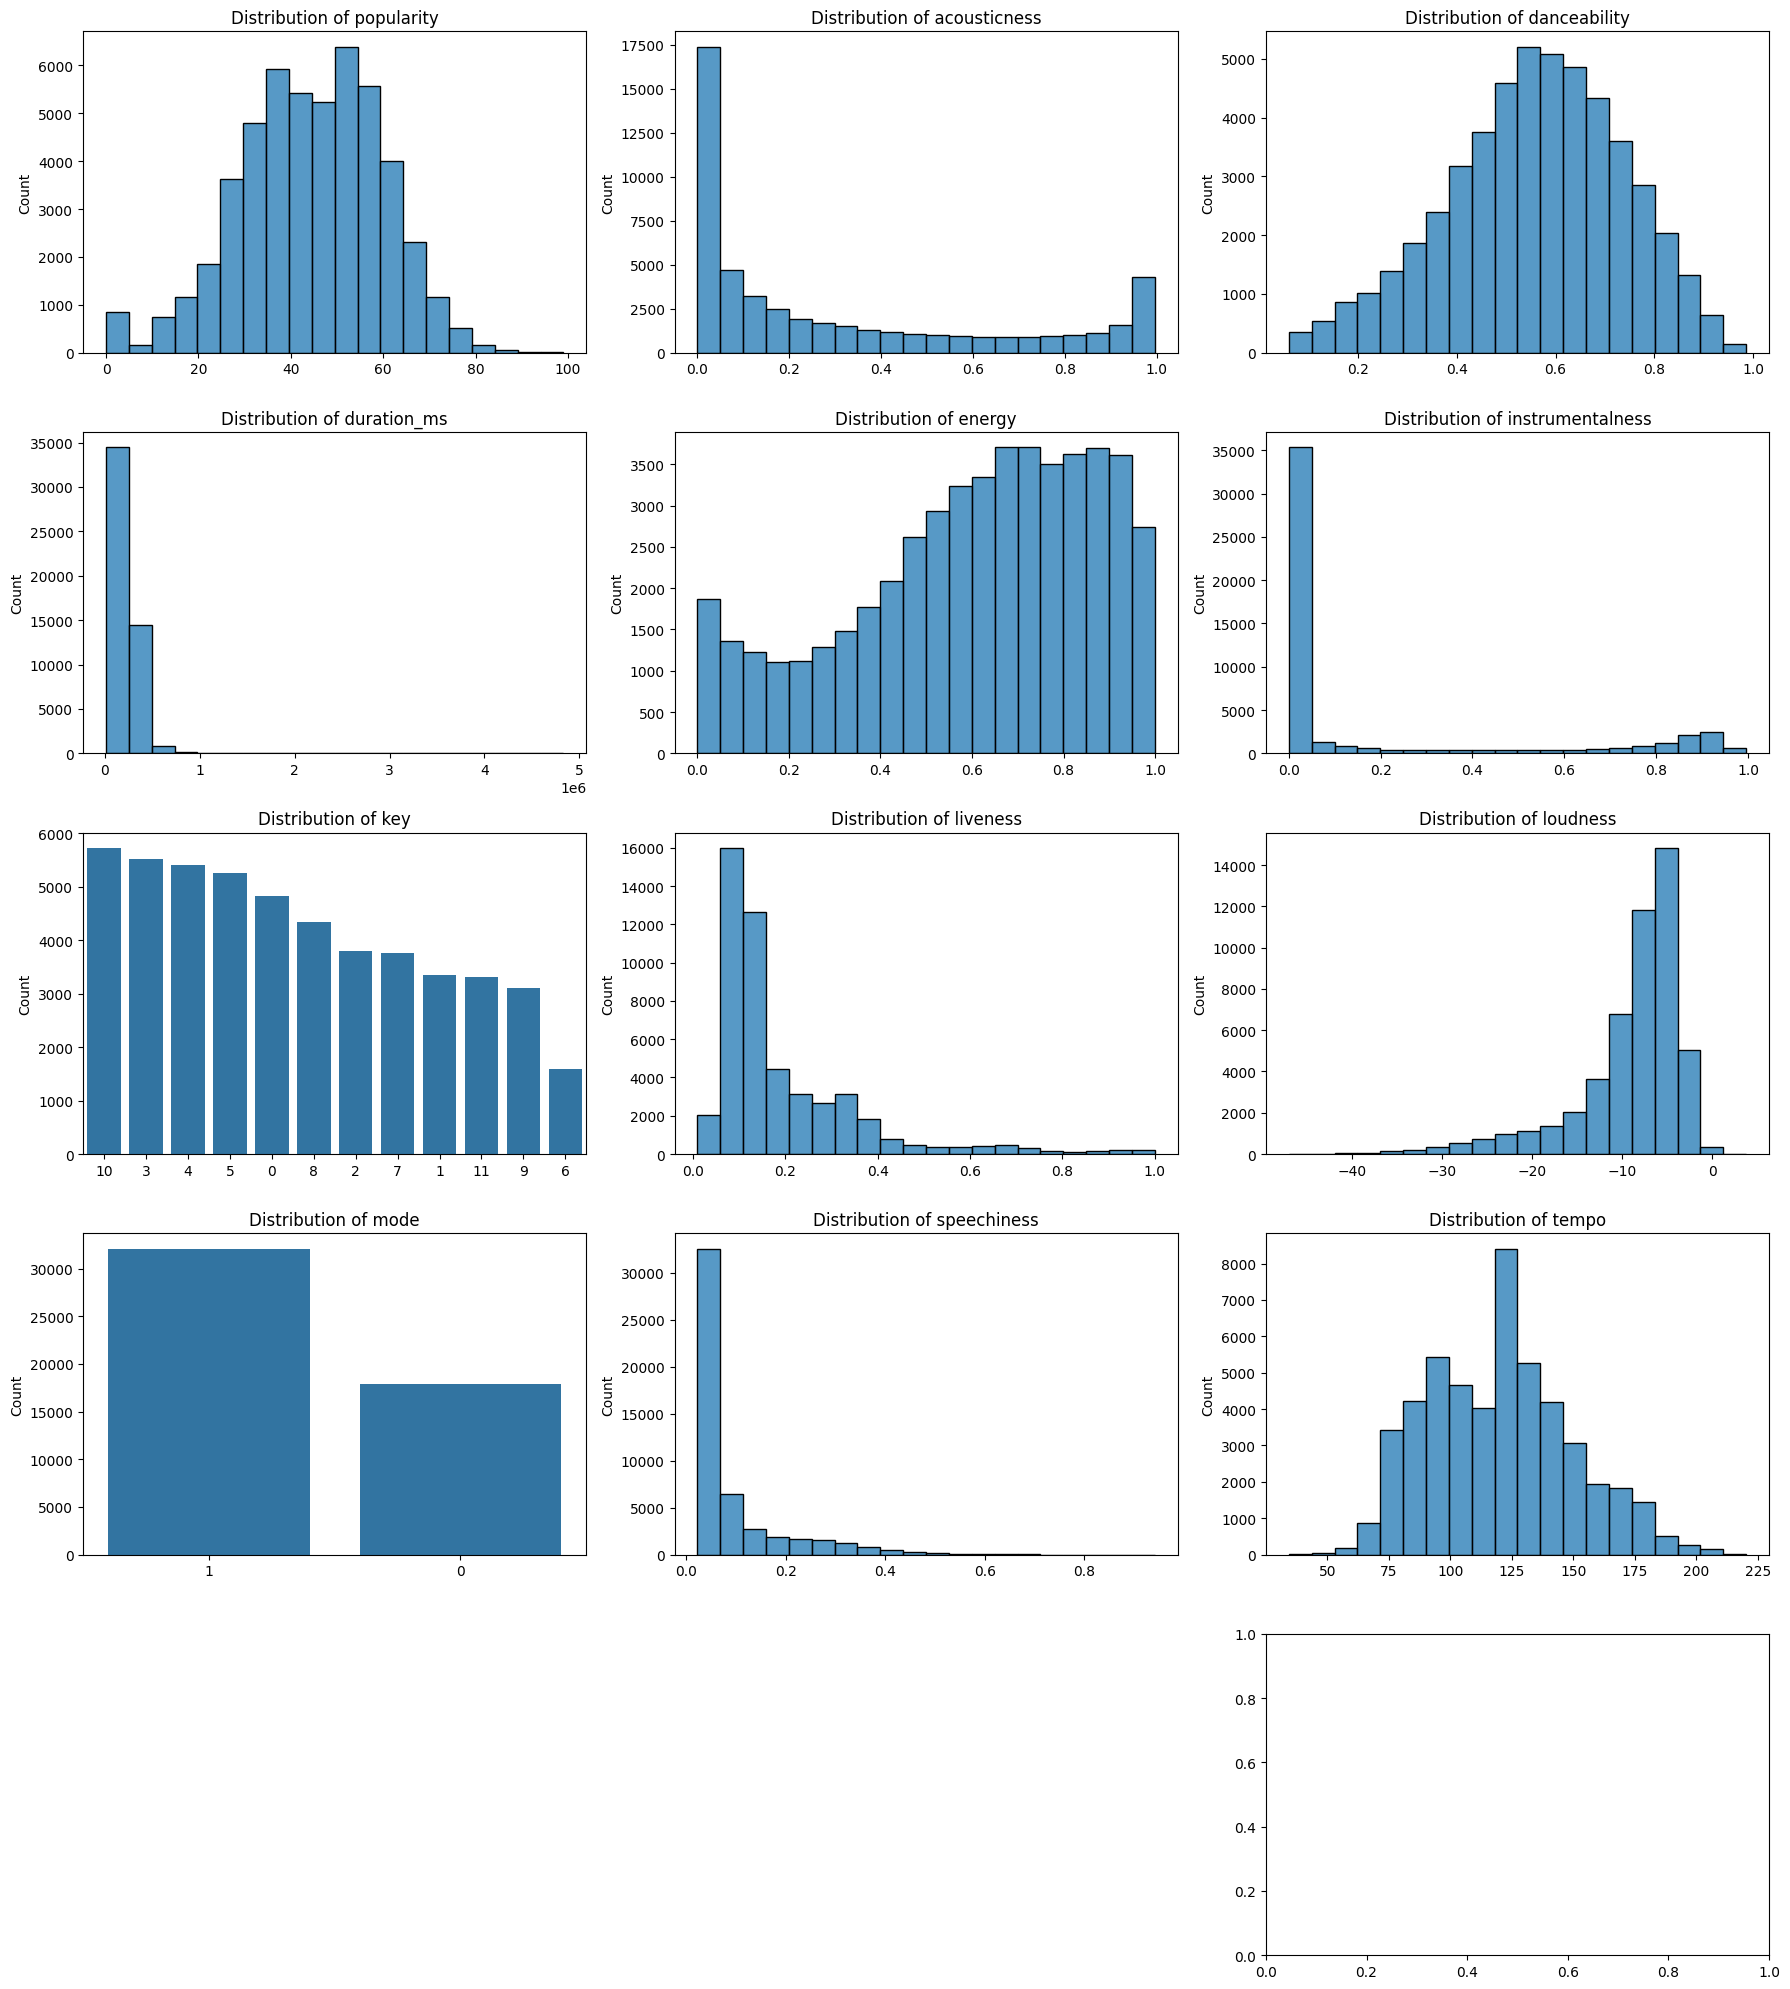

In [67]:
# List of all variables including numerical and categorical
all_vars = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
            'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'music_genre']

# Setting the plot size and layout for clarity
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, var in enumerate(all_vars):
    # Determine the plot type based on the data type
    if data[var].dtype == 'object' or var in ['key', 'mode', 'music_genre']:
        # Use countplot for categorical data
        sns.countplot(x=data[var], order=data[var].value_counts().index, ax=axes[i])
    else:
        # Use histplot for numerical data
        sns.histplot(data[var], kde=False, ax=axes[i], bins=20)  # Reduced the number of bins for simplicity

    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    if i >= 12:  # Adjust the number of subplots if there are fewer than 15 variables
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [68]:
# Check for duplicate entries in the dataset based on artist name and track name
duplicate_songs = data.duplicated(subset=['artist_name', 'track_name'], keep=False)

# Count the number of duplicate song entries
duplicate_song_count = duplicate_songs.sum()

# Display some examples of duplicate songs
duplicate_songs_examples = data[duplicate_songs].sort_values(by=['artist_name', 'track_name']).head(10)

duplicate_song_count, duplicate_songs_examples


(7473,
        instance_id  artist_name                  track_name  popularity  \
 3240       83947.0          !!!  Even When The Water's Cold        61.0   
 17469      51893.0          !!!  Even When The Water's Cold        52.0   
 28832      81298.0  $uicideBoy$                    2nd Hand        74.0   
 47807      53674.0  $uicideBoy$                    2nd Hand        74.0   
 26834      55684.0  $uicideBoy$      Do You Believe In God?        65.0   
 46645      61725.0  $uicideBoy$      Do You Believe In God?        65.0   
 25962      22449.0  $uicideBoy$                     Eclipse        62.0   
 46931      25114.0  $uicideBoy$                     Eclipse        62.0   
 28246      91079.0  $uicideBoy$              Elysian Fields        55.0   
 47964      24421.0  $uicideBoy$              Elysian Fields        55.0   
 
        acousticness  danceability  duration_ms  energy  instrumentalness  key  \
 3240         0.1080         0.709     227067.0   0.831           0.00128

In [69]:
# Find duplicates with inconsistent genre labels
duplicate_genre_inconsistencies = data[duplicate_songs].groupby(['artist_name', 'track_name'])['music_genre'].nunique() > 1
inconsistent_genre_duplicates = data[duplicate_songs].groupby(['artist_name', 'track_name']).filter(lambda x: x['music_genre'].nunique() > 1)

# Show some examples of inconsistent genre labels among duplicates
inconsistent_genre_examples = inconsistent_genre_duplicates.sort_values(by=['artist_name', 'track_name']).head(10)
inconsistent_genre_examples[['artist_name', 'track_name', 'music_genre']]


artist_name                  track_name  music_genre
3240           !!!  Even When The Water's Cold            5
17469          !!!  Even When The Water's Cold            0
28832  $uicideBoy$                    2nd Hand            8
47807  $uicideBoy$                    2nd Hand            6
26834  $uicideBoy$      Do You Believe In God?            8
46645  $uicideBoy$      Do You Believe In God?            6
25962  $uicideBoy$                     Eclipse            8
46931  $uicideBoy$                     Eclipse            6
28246  $uicideBoy$              Elysian Fields            8
47964  $uicideBoy$              Elysian Fields            6

In [70]:
# Drop irrelevant columns
data = data.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date'])


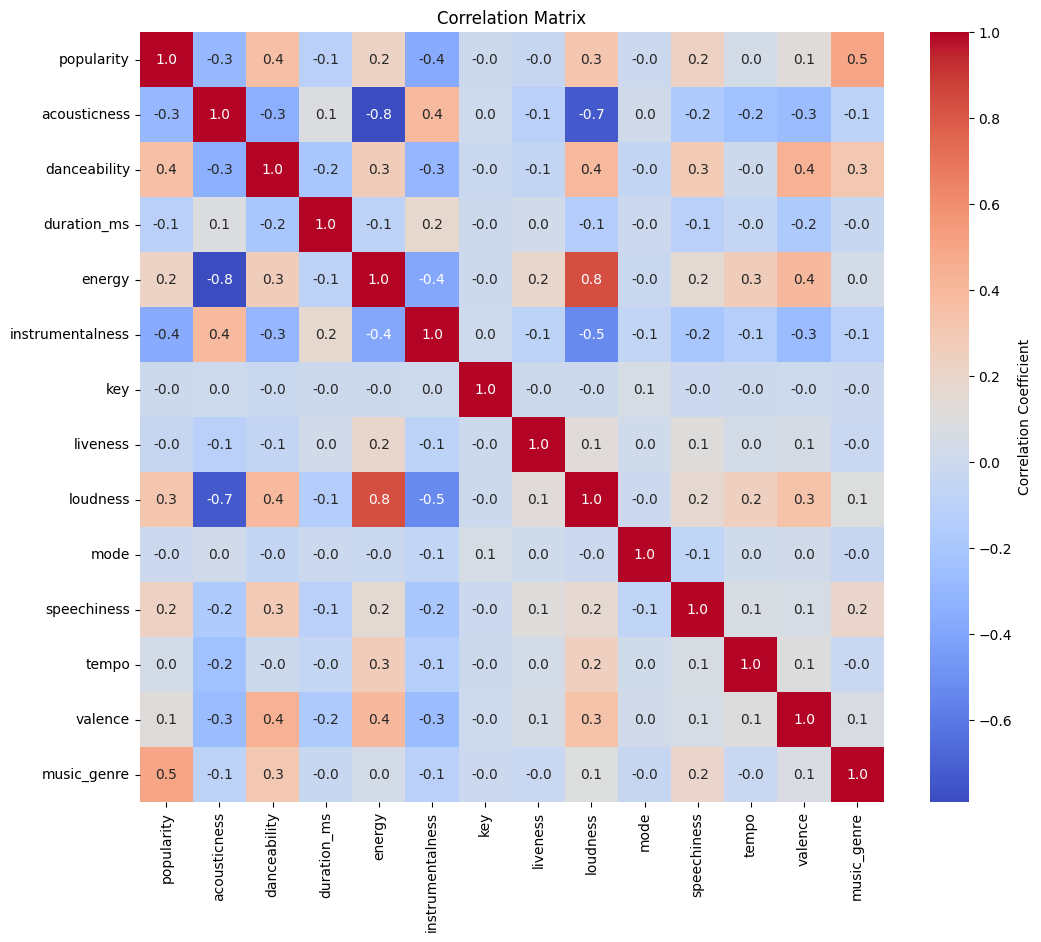

In [71]:
# Visualize the correlation matrix
corr = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

In [72]:
# Splitting data into training and test sets ensuring each genre is represented proportionally
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Ensure we have 500 test samples and 4500 training samples per genre
for label in data['music_genre'].unique():
    genre_data = data[data['music_genre'] == label]
    train, test = train_test_split(genre_data, test_size=500, random_state=16284294)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])



In [73]:
train_data.shape

(45000, 14)

In [74]:
test_data.shape

(5000, 14)

In [75]:
all_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
features_without_key_mode = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
          'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

X_train_all = train_data[all_features]
y_train = train_data['music_genre']
X_test_all = test_data[all_features]
y_test = test_data['music_genre']

X_train_no_key_mode = train_data[features_without_key_mode]
X_test_no_key_mode = test_data[features_without_key_mode]


Eigenvalues: [3.71631158 1.3512302  1.0528065  0.9708193  0.94314064 0.81884092
 0.72372728 0.59509724 0.46082137 0.25644185 0.11100757]
Explained Variance (%): [33.78389991 12.28363797  9.57075553  8.82543385  8.57381526  7.4438429
  6.57919271  5.40985466  4.18919213  2.33123777  1.00913731]


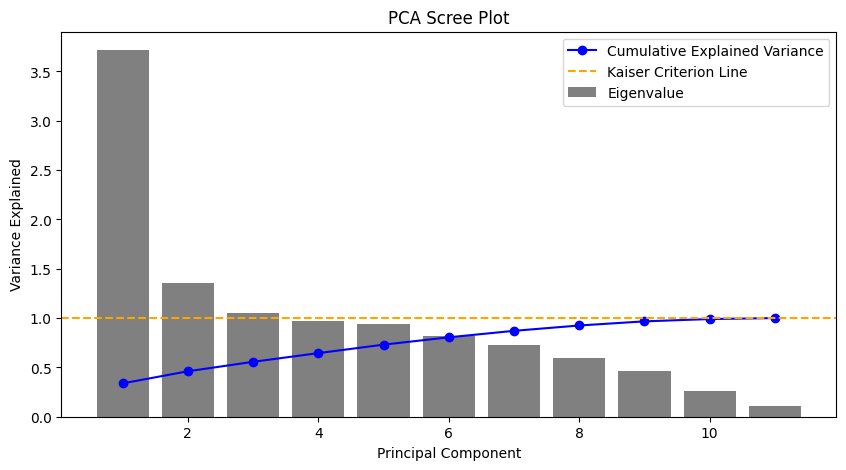

Number of factors by Kaiser criterion: 3
Number of factors by elbow criterion: 1
Number of factors to account for at least 90% variance: 8


In [76]:
# Standardizing the features before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_no_key_mode)  # Assume X_train_no_key_mode is predefined

# Performing PCA on the scaled data
pca = PCA().fit(scaled_data)

# Eigenvalues and explained variance
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)
varExplained = 100 * eigenvalues / sum(eigenvalues)
print("Explained Variance (%):", varExplained)

loadings = pca.components_
rotatedData = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(rotatedData)
princip_compon = rotatedData

# Scree plot
num_components = len(eigenvalues)
x_ticks = np.arange(1, num_components + 1)
plt.figure(figsize=(10, 5))
plt.bar(x_ticks, eigenvalues, color='gray', label='Eigenvalue')
plt.plot(x_ticks, np.cumsum(pca.explained_variance_ratio_), marker='o', color='blue', label='Cumulative Explained Variance')
plt.axhline(y=1, color='orange', linestyle='--', label="Kaiser Criterion Line")
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

# Criteria for determining the number of components
kaiserThreshold = 1
num_factors_kaiser = np.sum(eigenvalues > kaiserThreshold)
print(f'Number of factors by Kaiser criterion: {num_factors_kaiser}')

# Elbow criterion (visual inspection based on scree plot)
num_factors_elbow = 1  # This is visually determined; assumed here as an example
print(f'Number of factors by elbow criterion: {num_factors_elbow}')

# Number of factors that account for at least 90% of the variance
threshold = 90
factors_90_variance = np.argmax(np.cumsum(varExplained) >= threshold) + 1
print(f'Number of factors to account for at least 90% variance: {factors_90_variance}')

In [77]:
#This code is just to show much of the variance of the data is explained or accounted for by our 3 components
pca_var_explained = 0

for var in varExplained[0: (np.count_nonzero(eigenvalues > kaiserThreshold))]:
    pca_var_explained = pca_var_explained + var
print(f"The variance of the data that's explained by our {(np.count_nonzero(eigenvalues > kaiserThreshold))} PCs that we chose based on the Kaiser criterion, is {pca_var_explained.round(2)}%.")

The variance of the data that's explained by our 3 PCs that we chose based on the Kaiser criterion, is 55.64%.


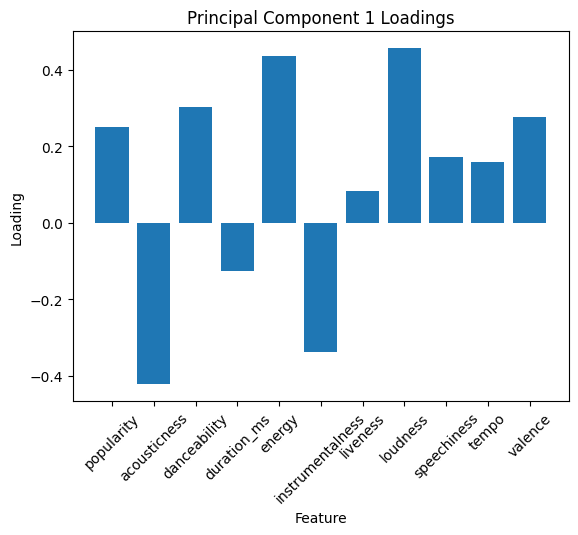

In [78]:
#Interpreting the factors - this is perhaps the step that requires the most "finesse"
whichPrincipalComponent = 0  # Select and look at one factor at a time, in Python indexing

# Select the specific principal component loadings
component_loadings = loadings[whichPrincipalComponent, :]*-1

# Create an array of indices for the features
feature_indices = np.arange(len(features_without_key_mode))

# Plot the loadings
plt.bar(feature_indices, component_loadings)
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title(f'Principal Component {whichPrincipalComponent + 1} Loadings')
plt.xticks(feature_indices, features_without_key_mode, rotation=45)
plt.show()

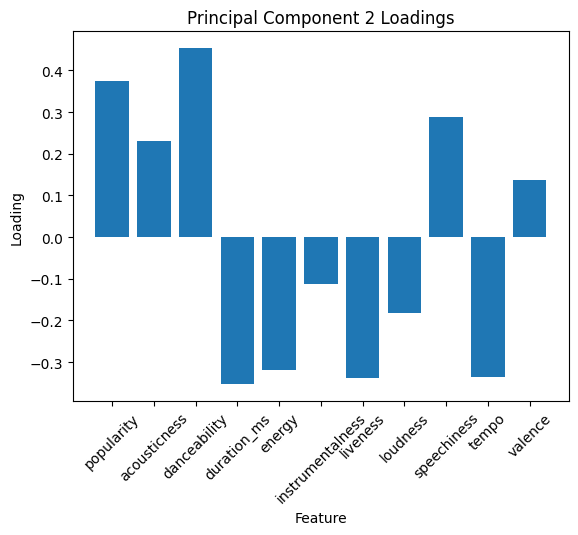

In [79]:
whichPrincipalComponent = 1  # Select and look at one factor at a time, in Python indexing

# Select the specific principal component loadings
component_loadings = loadings[whichPrincipalComponent, :]*-1

# Create an array of indices for the features
feature_indices = np.arange(len(features_without_key_mode))

# Plot the loadings
plt.bar(feature_indices, component_loadings)
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title(f'Principal Component {whichPrincipalComponent + 1} Loadings')
plt.xticks(feature_indices, features_without_key_mode, rotation=45)
plt.show()

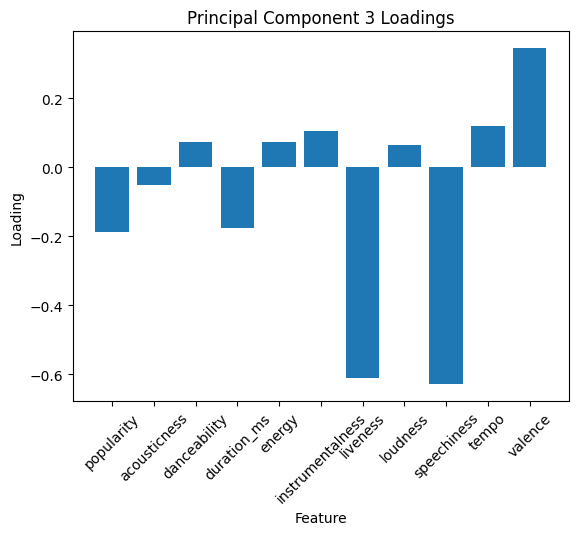

In [80]:
whichPrincipalComponent = 2  # Select and look at one factor at a time, in Python indexing

# Select the specific principal component loadings
component_loadings = loadings[whichPrincipalComponent, :]*-1 #basically how components_ is is it is (components, features)
# therefore each row is the weight of each feature in a new component

# Create an array of indices for the features
feature_indices = np.arange(len(features_without_key_mode))

# Plot the loadings
plt.bar(feature_indices, component_loadings)
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title(f'Principal Component {whichPrincipalComponent + 1} Loadings')
plt.xticks(feature_indices, features_without_key_mode, rotation=45)
plt.show()

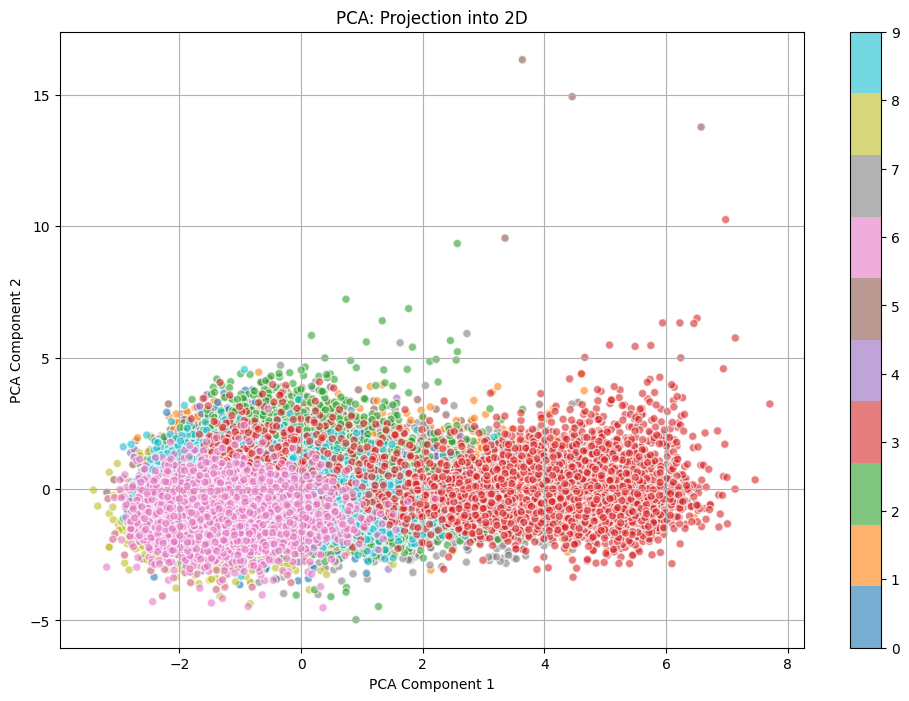

In [81]:
# Applying Principal Component Analysis
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(scaled_data)
cmap = plt.get_cmap('tab10')
# Plotting the results of PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c= y_train, cmap=cmap, edgecolor='white', alpha=0.6)
plt.title('PCA: Projection into 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.grid(True)
plt.show()

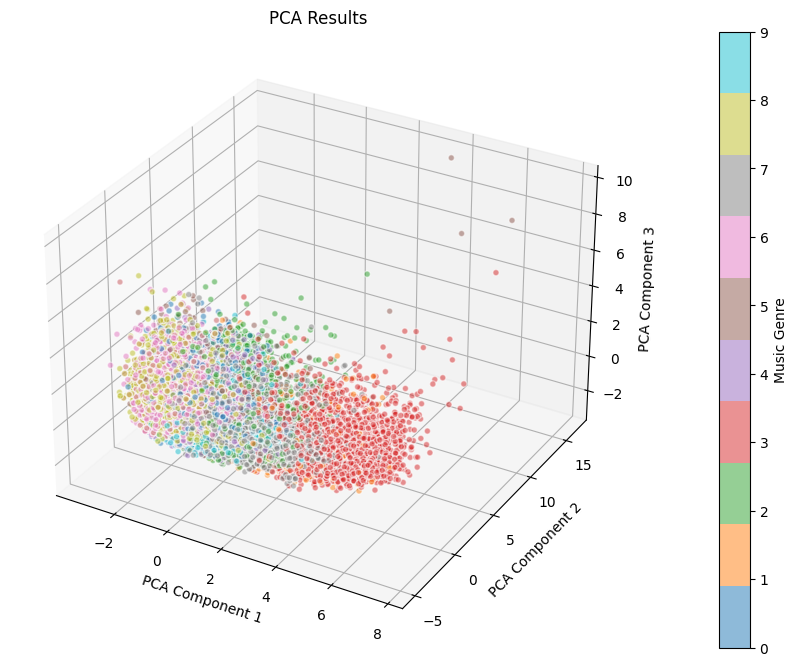

In [82]:
#PCA CLUSTERING
# Selecting only the first 3 principal components from PCA
# Performing PCA to reduce dimensions to 3 for the 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(scaled_data)

cmap = plt.get_cmap('tab10')
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111, projection='3d')
scatter = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c= y_train, cmap=cmap, edgecolor='white', alpha=0.5)
ax1.set_title('PCA Results')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_zlabel('PCA Component 3')

# Adding a color bar as legend, correctly associated with the scatter plot
cbar = fig.colorbar(scatter, ax=ax1, pad=0.1)
cbar.set_label('Music Genre')
plt.show()

Explained varianace ratio: [6.41972028e-01 1.71747775e-01 1.11777846e-01 3.65190753e-02
 2.35229090e-02 7.86984474e-03 5.76016233e-03 7.52831478e-04
 7.75279707e-05]


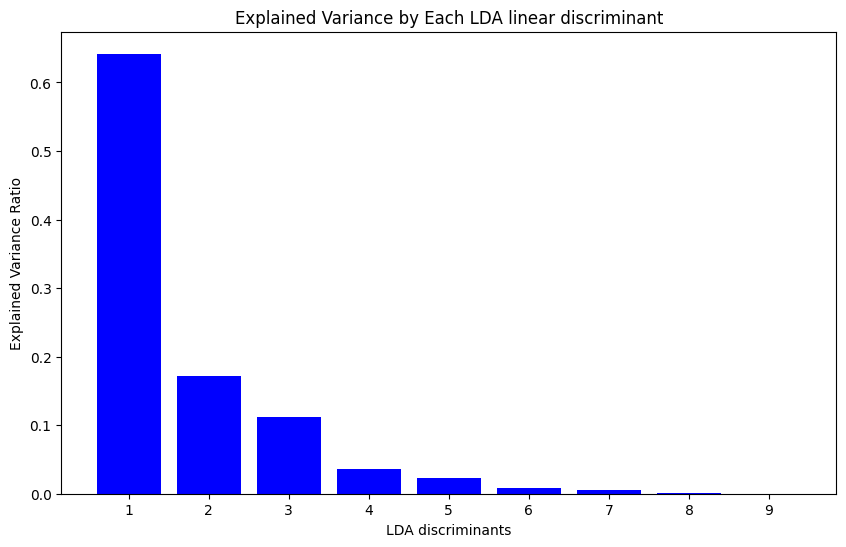

Cumulative Explained Variance by 1 linear discriminant: 64.19%
Cumulative Explained Variance by 2 linear discriminants: 64.19% + 17.17% = 81.36%
Cumulative Explained Variance by 3 linear discriminants: 64.19% + 17.17% + 11.17% = 92.53%
Cumulative Explained Variance by 4 linear discriminants: 64.19% + 17.17% + 11.17% + 3.65% = 96.18%


In [83]:
# Standardizing the features before applying LDA
scaler = StandardScaler()
scaled_data_all = scaler.fit_transform(X_train_all)

# Initialize LDA
lda = LinearDiscriminantAnalysis()

# Fit LDA to the data
X_lda = lda.fit_transform(scaled_data_all, y_train)

# Explained variance ratio
explained_variance_ratio = lda.explained_variance_ratio_
print("Explained varianace ratio:", explained_variance_ratio)

# Data for plotting
components = range(1, len(explained_variance_ratio) + 1)
explained_variance = explained_variance_ratio

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance, color='blue')
plt.xlabel('LDA discriminants')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each LDA linear discriminant')
plt.xticks(components)
plt.show()
print("Cumulative Explained Variance by 1 linear discriminant: 64.19%")
print("Cumulative Explained Variance by 2 linear discriminants: 64.19% + 17.17% = 81.36%")
print("Cumulative Explained Variance by 3 linear discriminants: 64.19% + 17.17% + 11.17% = 92.53%")
print("Cumulative Explained Variance by 4 linear discriminants: 64.19% + 17.17% + 11.17% + 3.65% = 96.18%")

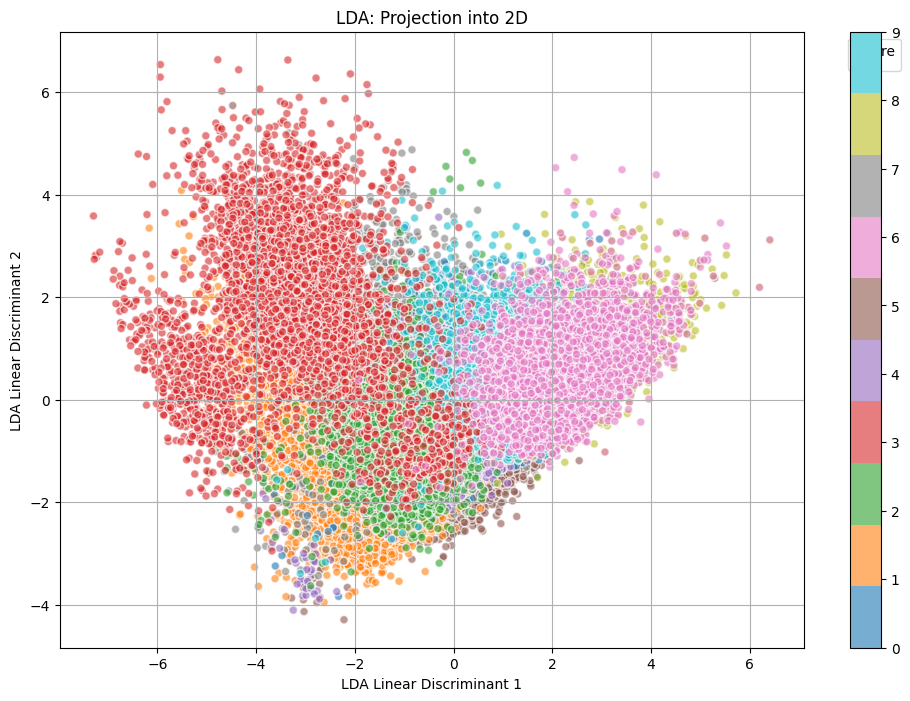

In [84]:
# Applying Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)  # Reducing to two components for visualization
X_lda = lda.fit_transform(scaled_data_all, y_train)

# Plotting the results of LDA
cmap = plt.get_cmap('tab10')
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap=cmap, edgecolor='white', alpha=0.6)
plt.title('LDA: Projection into 2D')
plt.xlabel('LDA Linear Discriminant 1')
plt.ylabel('LDA Linear Discriminant 2')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(scatter)
plt.grid(True)
plt.show()

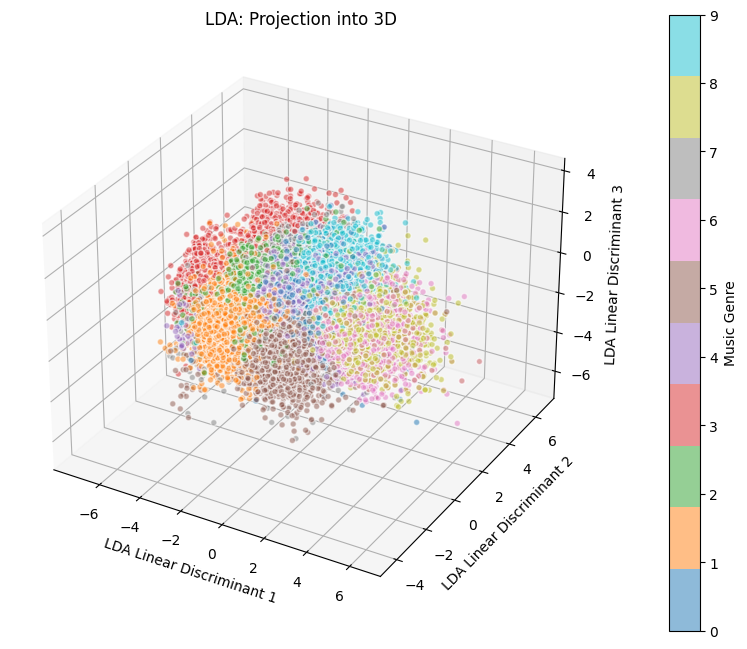

In [85]:
# Applying Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(scaled_data_all, y_train)
cmap = plt.get_cmap('tab10')
# Plotting the results of LDA
fig = plt.figure(figsize=(10, 8))
ax2 = fig.add_subplot(111, projection='3d')
scatter = ax2.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y_train, cmap=cmap, edgecolor='white', alpha=0.5)
ax2.set_title('LDA: Projection into 3D')
ax2.set_xlabel('LDA Linear Discriminant 1')
ax2.set_ylabel('LDA Linear Discriminant 2')
ax2.set_zlabel('LDA Linear Discriminant 3')
plt.grid(True)
# Adding a color bar as legend, correctly associated with the scatter plot
cbar = fig.colorbar(scatter, ax=ax2, pad=0.1)
cbar.set_label('Music Genre')
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


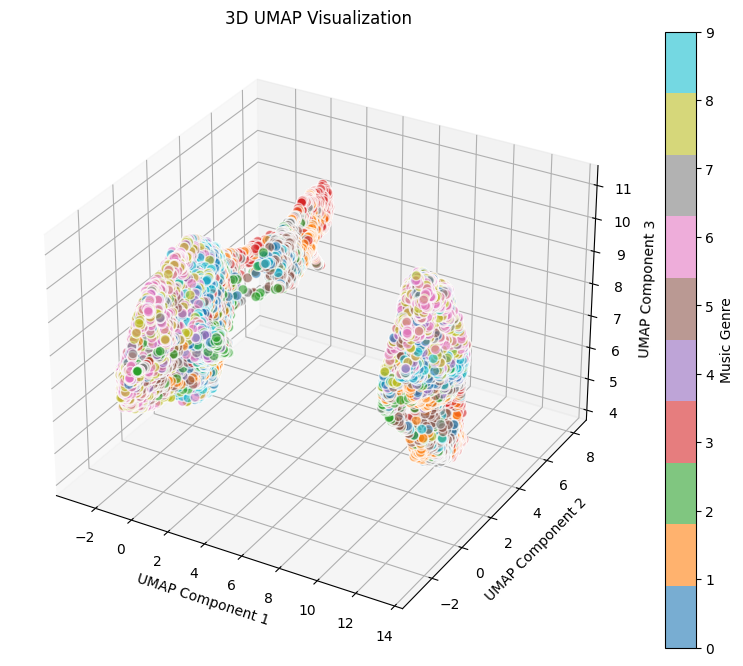

In [86]:
scaler = StandardScaler()
scaled_data_all = scaler.fit_transform(X_train_all)
# Step 1: Initialize and fit UMAP
umap_reducer = umap.UMAP(n_components=3, random_state=16284294)
X_umap = umap_reducer.fit_transform(scaled_data_all)

# Step 2: Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('tab10')

scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=y_train, cmap=cmap, edgecolor='white', s=50, alpha=0.6)
ax.set_title('3D UMAP Visualization')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')

# Color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Music Genre')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


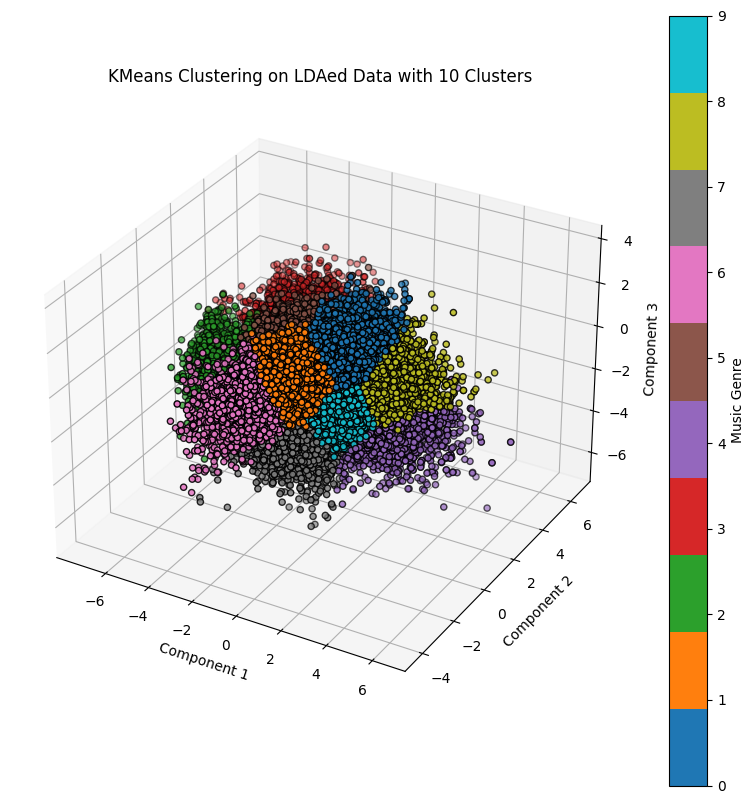

In [87]:
# Define cluster counts to experiment with
cluster_counts = [10]

# For storing clustering results
results = {}

for n_clusters in cluster_counts:
    # KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=16284294)
    lda_kmeans_labels = kmeans.fit_predict(X_lda[:, :3])  # first three LDA discrimnants

    # Save results
    results[n_clusters] = {
        'LDA': {'KMeans': lda_kmeans_labels}
    }

    # Visualization for each result
    for reduction_type, clustering_results in results[n_clusters].items():
        for algorithm, labels in clustering_results.items():
            fig = plt.figure(figsize=(10, 10))
            cmap = plt.get_cmap('tab10')
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=labels, cmap=cmap, edgecolor='k')
            ax.set_title(f'{algorithm} Clustering on {reduction_type}ed Data with {n_clusters} Clusters')
            ax.set_xlabel('Component 1')
            ax.set_ylabel('Component 2')
            ax.set_zlabel('Component 3')
            #plt.colorbar(scatter)
            # Color bar
            cbar = fig.colorbar(scatter, ax=ax)
            cbar.set_label('Music Genre')
            plt.show()


In [88]:
all_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
features_without_key_mode = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
          'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

X_train_all = train_data[all_features]
y_train = train_data['music_genre']
X_test_all = test_data[all_features]
y_test = test_data['music_genre']
X_train_no_key_mode = train_data[features_without_key_mode]
X_test_no_key_mode = test_data[features_without_key_mode]

In [89]:
# Set up the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=16284294)

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_dt.fit(X_train_all, y_train)

# Best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

# Evaluate on test data
y_pred_dt = grid_search_dt.predict(X_test_all)
print(classification_report(y_test, y_pred_dt))

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score for Decision Tree: 0.5380888888888888
              precision    recall  f1-score   support

           0       0.43      0.33      0.37       500
           1       0.78      0.67      0.72       500
           2       0.52      0.45      0.49       500
           3       0.84      0.77      0.80       500
           4       0.45      0.57      0.51       500
           5       0.55      0.46      0.50       500
           6       0.48      0.40      0.43       500
           7       0.44      0.50      0.47       500
           8       0.45      0.54      0.49       500
           9       0.48      0.65      0.55       500

    accuracy                           0.53      5000
   macro avg       0.54      0.53      0.53      5000
weighted avg       0.54      0.53      0.53      5000



(LDA) Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.31      0.25      0.28       500
           1       0.58      0.59      0.59       500
           2       0.42      0.39      0.40       500
           3       0.77      0.81      0.79       500
           4       0.36      0.42      0.39       500
           5       0.53      0.58      0.56       500
           6       0.47      0.49      0.48       500
           7       0.40      0.31      0.35       500
           8       0.47      0.39      0.43       500
           9       0.47      0.62      0.53       500

    accuracy                           0.48      5000
   macro avg       0.48      0.48      0.48      5000
weighted avg       0.48      0.48      0.48      5000

LDA AUC (One-vs-Rest): 0.89


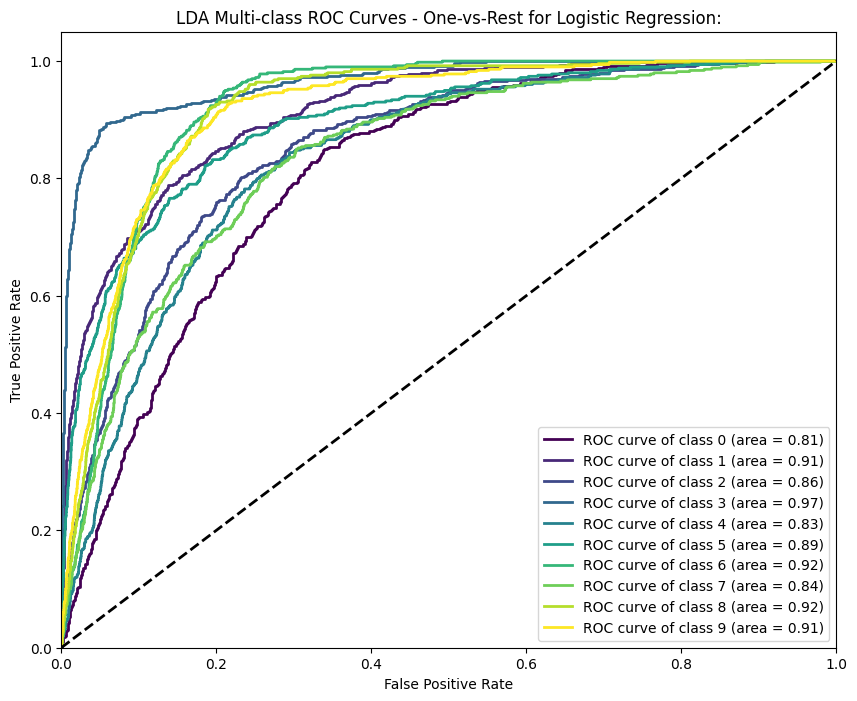

(LDA) Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.30      0.30      0.30       500
           1       0.67      0.59      0.63       500
           2       0.45      0.41      0.43       500
           3       0.80      0.79      0.80       500
           4       0.34      0.33      0.33       500
           5       0.52      0.50      0.51       500
           6       0.31      0.35      0.33       500
           7       0.37      0.37      0.37       500
           8       0.29      0.28      0.29       500
           9       0.45      0.55      0.49       500

    accuracy                           0.45      5000
   macro avg       0.45      0.45      0.45      5000
weighted avg       0.45      0.45      0.45      5000

LDA AUC (One-vs-Rest): 0.87


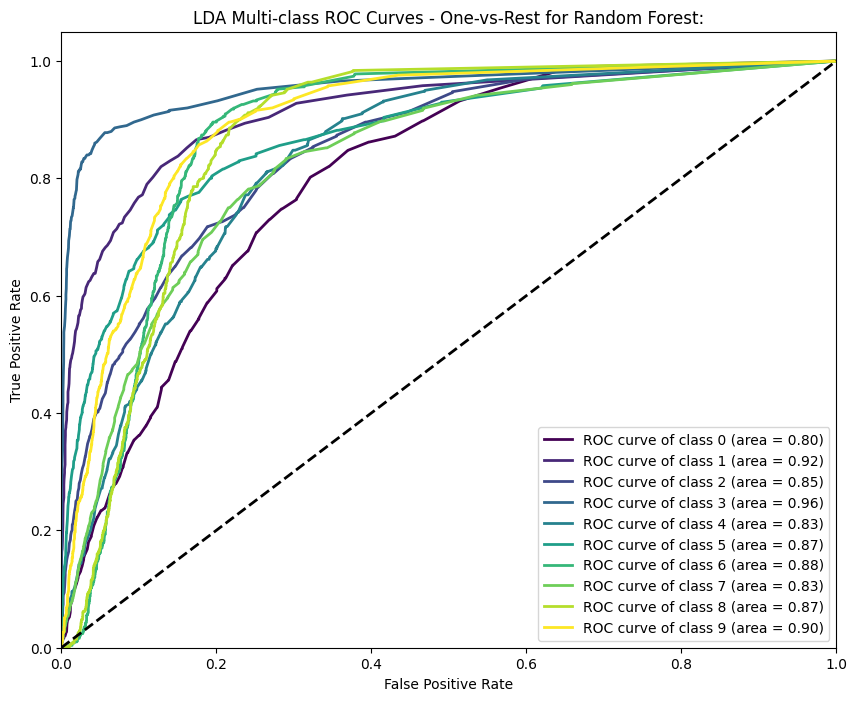

(LDA) Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25       500
           1       0.54      0.50      0.52       500
           2       0.35      0.35      0.35       500
           3       0.72      0.72      0.72       500
           4       0.29      0.31      0.30       500
           5       0.43      0.42      0.42       500
           6       0.29      0.35      0.32       500
           7       0.28      0.28      0.28       500
           8       0.28      0.26      0.27       500
           9       0.42      0.38      0.40       500

    accuracy                           0.38      5000
   macro avg       0.39      0.38      0.38      5000
weighted avg       0.39      0.38      0.38      5000

LDA AUC (One-vs-Rest): 0.66


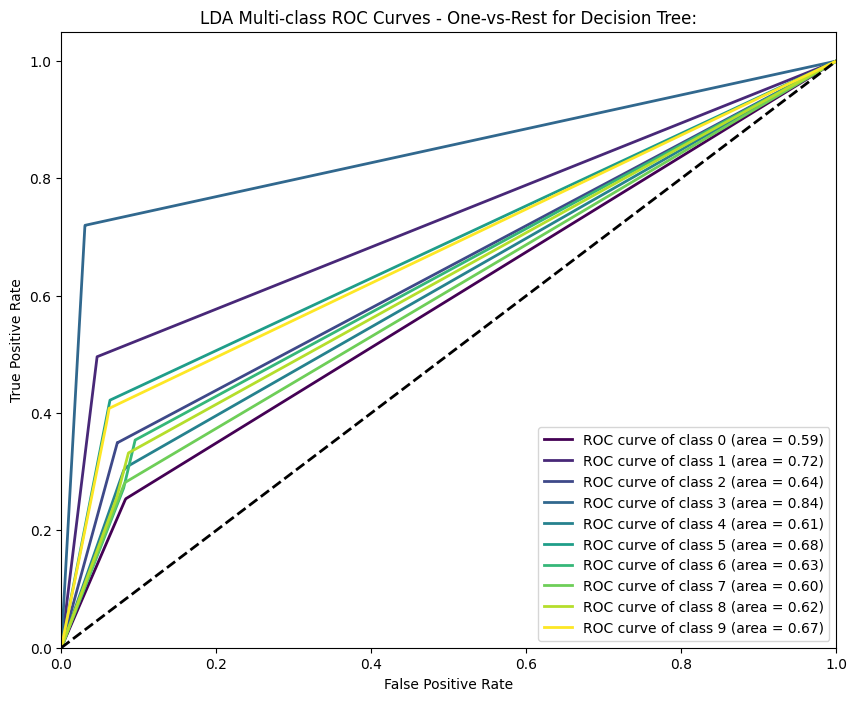

In [90]:
all_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode']

X_train_all = train_data[all_features]
y_train = train_data['music_genre']
X_test_all = test_data[all_features]
y_test = test_data['music_genre']

# Create transformers for continuous and categorical data
variable_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components = 3))
])

# Preprocessing steps
preprocessor = ColumnTransformer(transformers=[('all', variable_transformer, all_features)])

# Define classifiers to be tested
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=16284294),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=16284294),
    'Decision Tree': DecisionTreeClassifier(random_state=16284294)
}

# Modeling pipeline
for name, classifier in classifiers.items():
    pipeline_lda = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    # Fit the model
    pipeline_lda.fit(X_train_all, y_train)

    # Evaluate the model
    y_pred = pipeline_lda.predict(X_test_all)
    print(f"(LDA) Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Predicting probabilities
    y_prob = pipeline_lda.predict_proba(X_test_all)
    # Calculating multi-class AUC using One-vs-Rest (OvR) approach
    auc_score = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
    print("LDA AUC (One-vs-Rest): {:.2f}".format(auc_score))

    # Step 1: Binarize the output classes
    y_train_binarized = label_binarize(y_train, classes=np.arange(10))
    y_test_binarized = label_binarize(y_test, classes=np.arange(10))

    # Step 2: Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_train_binarized.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Step 3: Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = [plt.cm.viridis(i / float(n_classes-1)) for i in range(n_classes)]
    for i, color in enumerate(colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2,
          label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"LDA Multi-class ROC Curves - One-vs-Rest for {name}:")
    plt.legend(loc="lower right")
    plt.show()
    print("="*80)  # Separator for reports

(LDA) Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.31      0.25      0.28       500
           1       0.58      0.59      0.59       500
           2       0.42      0.39      0.40       500
           3       0.77      0.81      0.79       500
           4       0.36      0.42      0.39       500
           5       0.53      0.58      0.56       500
           6       0.47      0.49      0.48       500
           7       0.40      0.31      0.35       500
           8       0.47      0.39      0.43       500
           9       0.47      0.62      0.53       500

    accuracy                           0.48      5000
   macro avg       0.48      0.48      0.48      5000
weighted avg       0.48      0.48      0.48      5000

LDA AUC (One-vs-Rest): 0.89


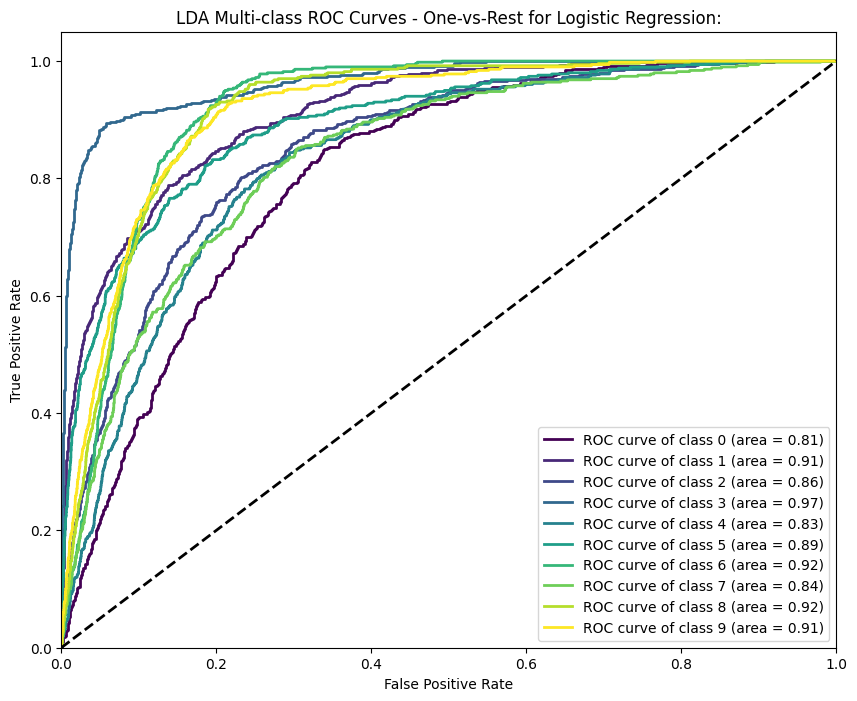

(LDA) Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       500
           1       0.67      0.59      0.63       500
           2       0.46      0.41      0.43       500
           3       0.81      0.79      0.80       500
           4       0.33      0.33      0.33       500
           5       0.54      0.51      0.53       500
           6       0.31      0.34      0.33       500
           7       0.38      0.37      0.37       500
           8       0.29      0.29      0.29       500
           9       0.44      0.56      0.49       500

    accuracy                           0.45      5000
   macro avg       0.45      0.45      0.45      5000
weighted avg       0.45      0.45      0.45      5000

LDA AUC (One-vs-Rest): 0.87


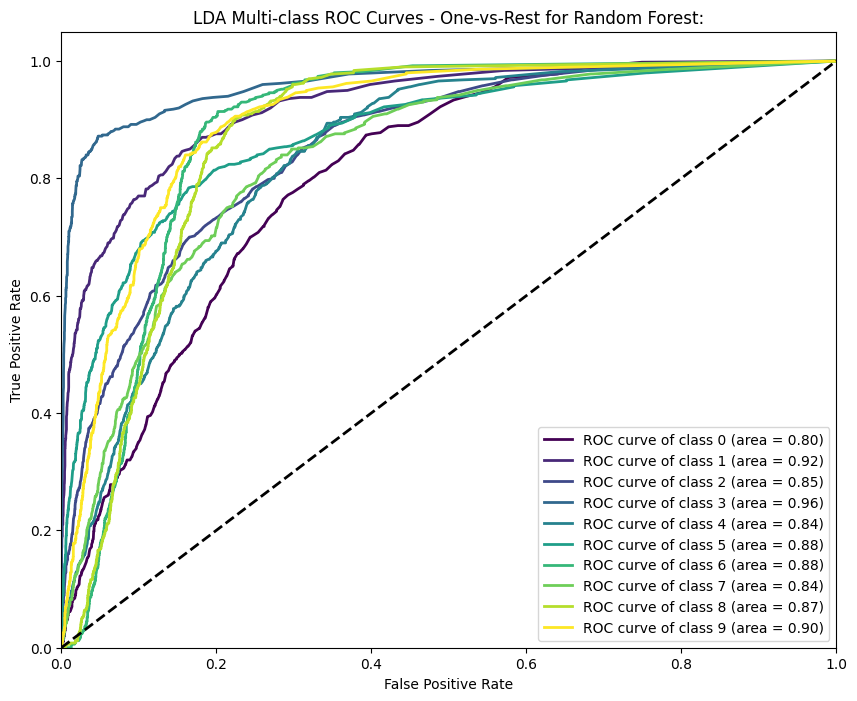

(LDA) Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.31      0.22      0.25       500
           1       0.71      0.58      0.64       500
           2       0.46      0.44      0.45       500
           3       0.82      0.76      0.79       500
           4       0.35      0.40      0.37       500
           5       0.62      0.48      0.54       500
           6       0.40      0.51      0.45       500
           7       0.39      0.41      0.40       500
           8       0.45      0.36      0.40       500
           9       0.43      0.67      0.53       500

    accuracy                           0.48      5000
   macro avg       0.49      0.48      0.48      5000
weighted avg       0.49      0.48      0.48      5000

LDA AUC (One-vs-Rest): 0.88


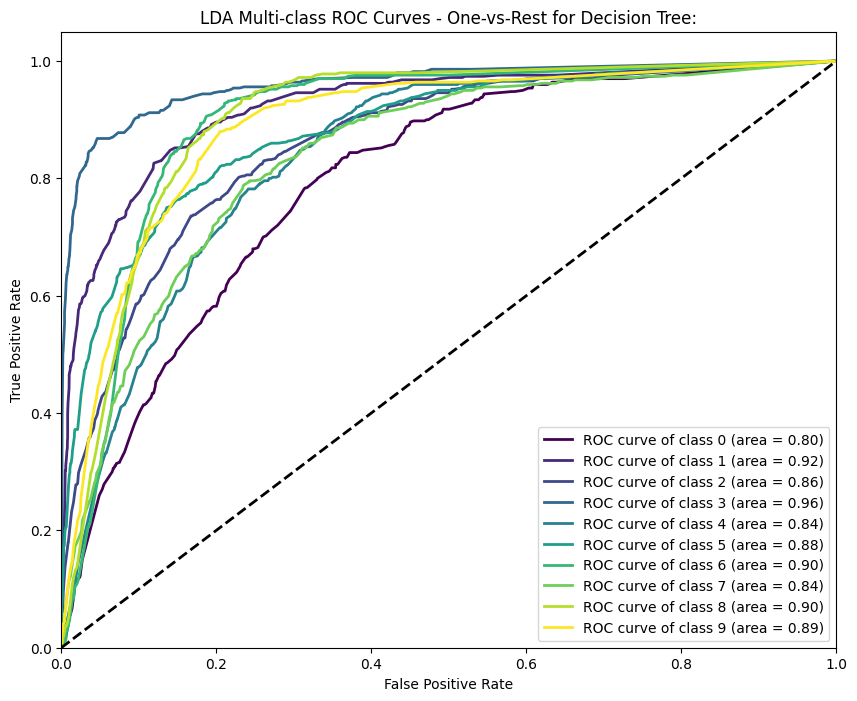

In [91]:
all_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key', 'mode']

X_train_all = train_data[all_features]
y_train = train_data['music_genre']
X_test_all = test_data[all_features]
y_test = test_data['music_genre']

# Create transformers for continuous and categorical data
variable_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components = 3))
])

# Preprocessing steps
preprocessor = ColumnTransformer(transformers=[('all', variable_transformer, all_features)])

# Define classifiers to be tested
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=16284294),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=16284294),
    'Decision Tree': DecisionTreeClassifier(random_state=16284294, criterion='gini', max_depth=10, min_samples_leaf=10, min_samples_split=2)
}

# Modeling pipeline
for name, classifier in classifiers.items():
    pipeline_lda = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    # Fit the model
    pipeline_lda.fit(X_train_all, y_train)

    # Evaluate the model
    y_pred = pipeline_lda.predict(X_test_all)
    print(f"(LDA) Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Predicting probabilities
    y_prob = pipeline_lda.predict_proba(X_test_all)
    # Calculating multi-class AUC using One-vs-Rest (OvR) approach
    auc_score = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
    print("LDA AUC (One-vs-Rest): {:.2f}".format(auc_score))

    # Step 1: Binarize the output classes
    y_train_binarized = label_binarize(y_train, classes=np.arange(10))
    y_test_binarized = label_binarize(y_test, classes=np.arange(10))

    # Step 2: Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_train_binarized.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Step 3: Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = [plt.cm.viridis(i / float(n_classes-1)) for i in range(n_classes)]
    for i, color in enumerate(colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2,
          label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"LDA Multi-class ROC Curves - One-vs-Rest for {name}:")
    plt.legend(loc="lower right")
    plt.show()
    print("="*80)  # Separator for reports

Interesting things:

<ipython-input-92-15dda5b79082>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_5.index, y=top_artists_5.values, palette='viridis')


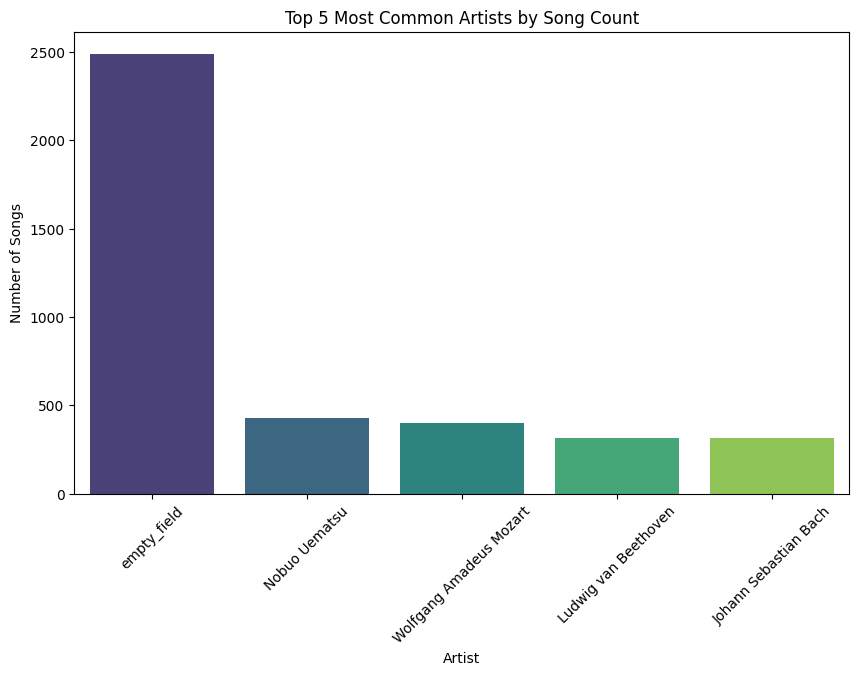

In [92]:
file_path = 'musicData.csv'
data_new = pd.read_csv(file_path)
data_new.dropna(inplace=True)
# Counting the occurrences of each artist in the dataset
artist_counts = data_new['artist_name'].value_counts()

# Display the top 5 most common artists by count
top_artists_5 = artist_counts.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_5.index, y=top_artists_5.values, palette='viridis')
plt.title('Top 5 Most Common Artists by Song Count')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()


In [93]:
# Filter the data where artist names are 'empty_field'
empty_field_data_new = data_new[data_new['artist_name'] == 'empty_field']

# Count occurrences of each genre within the 'empty_field' artist entries
genre_counts_for_empty_fields = empty_field_data_new['music_genre'].value_counts()

# Display the counts of each genre for entries with 'empty_field' as the artist name
genre_counts_for_empty_fields


music_genre
Anime          272
Alternative    272
Classical      266
Rap            263
Blues          255
Hip-Hop        245
Rock           242
Jazz           230
Electronic     223
Country        221
Name: count, dtype: int64

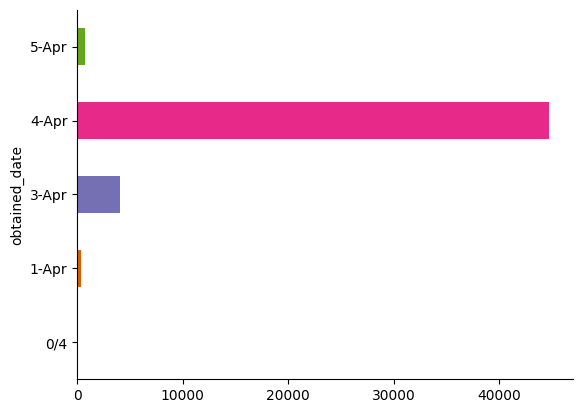

In [94]:
#most common obtained dates in the dataset
data_new.groupby('obtained_date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)